# T4 FOXSI2 - Quiet Sun Analysis for D0145
## November 2020
## Milo BC - Berkeley

In [1]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap 
import numpy as np
import astropy.io.fits as pyfits
from glob import glob

# Parameters
Dir = './D0145_rays/'
Dang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
T4x, T4y = 200, 750    # Target center
sim_scale = 1031.328   # 1cm = 1031.328 arcsec
#sim_scale = 17.18880   # 1cm = 17.4 arcmin
Xmask, Ymask = -240, 360
Rmask = 530
Rsun  = 960 # value based on Martin's paper: http://adsabs.harvard.edu/full/2005ESASP.600E...4F

def readrays(file):
    # load rays
    Rays = load_rays(file)
    # fix a small bug
    for r in Rays:
        r.hist = r.hist.tolist()
    # Create detector :
    detector = Detector(width=40,
                        height=40,
                        normal = [0,0,1],
                        center = [0,0,230], # f-distance + segment lenght
                        reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Rays)
    # Select D, H, and P rays
    Drays = [r for r in Rays if (r.des[2]==230 and r.bounces ==2 )]
    Srays = [r for r in Rays if (r.des[2]==230 and r.bounces ==1 )]
    Hrays = [r for r in Rays if (r.des[2]==230 and r.bounces ==1 and r.tag[-4:] == 'Hy-D' )]
    Prays = [r for r in Rays if (r.des[2]==230 and r.bounces ==1 and r.tag[-4:] == 'Pa-D' )]
    # Define initial void lists to store rays to return
    All_Hx, All_Hy, All_Px, All_Py, All_Dx, All_Dy = [], [], [], [], [], []    
    #Hyperboloid
    Hx, Hy = [], []
    for r in Hrays:
        Hx.append(r.pos[0]*sim_scale + T4x)
        Hy.append(r.pos[1]*sim_scale + T4y)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
    # Paraboloid
    Px, Py = [], []
    for r in Prays:
        Px.append(r.pos[0]*sim_scale + T4x)
        Py.append(r.pos[1]*sim_scale + T4y)
    All_Px.append(Px)
    All_Py.append(Py)
    # Double
    Dx, Dy = [], []
    for r in Drays:
        Dx.append(r.pos[0]*sim_scale + T4x)
        Dy.append(r.pos[1]*sim_scale + T4y)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    
    return All_Hx, All_Hy, All_Px, All_Py, All_Dx, All_Dy

Rays from ./D0145_rays/D0145S1.csv loaded.
reading ./D0145_rays/D0145S1.csv
Rays from ./D0145_rays/D0145S2.csv loaded.
reading ./D0145_rays/D0145S2.csv
Rays from ./D0145_rays/D0145S3.csv loaded.
reading ./D0145_rays/D0145S3.csv
Rays from ./D0145_rays/D0145S4.csv loaded.
reading ./D0145_rays/D0145S4.csv
Rays from ./D0145_rays/D0145S5.csv loaded.
reading ./D0145_rays/D0145S5.csv


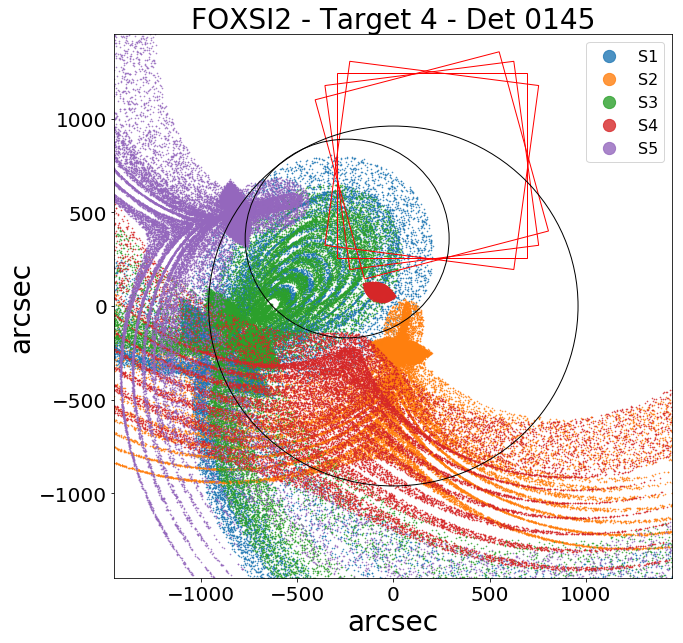

In [2]:
# Plotting
tabcolors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
fig, ax = plt.subplots(figsize=(10,10))
# ornaments
ax.set_xlim(-1450,1450)
ax.set_ylim(-1450,1450)
ax.set_xlabel('arcsec',fontsize=28)
ax.set_ylabel('arcsec',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI2 - Target 4 - Det 0145',fontsize=28)
# sources:
for tc, source in zip(tabcolors, sorted(glob(Dir+'*.csv'))):
    S_Hx, S_Hy, S_Px, S_Py, S_Dx, S_Dy = readrays(source) # Read Rays
    print('reading '+source)
    ax.scatter(S_Hx,S_Hy,color=tc,s=.4,alpha=0.8,label=source[-6:-4])
    ax.scatter(S_Px,S_Py,color=tc,s=.4,alpha=0.8)
    ax.scatter(S_Dx,S_Dy,color=tc,s=.4,alpha=0.8)
# D0145 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[0]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[0]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[1]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[1]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[1],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[4]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[4]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[5]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[5]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[5],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
solardisk = patches.Circle((0,0),radius= Rsun,fill=False);ax.add_patch(solardisk)
circ = patches.Circle((Xmask,Ymask),radius= Rmask,fill=False);ax.add_patch(circ)
# legend
lgnd = ax.legend(loc='upper right',scatterpoints=1, fontsize=16)
lgnd.legendHandles[0]._sizes = [150]
lgnd.legendHandles[1]._sizes = [150]
lgnd.legendHandles[2]._sizes = [150]
lgnd.legendHandles[3]._sizes = [150]
lgnd.legendHandles[4]._sizes = [150]
plt.show()
fig.savefig('images/SourcesT4_D0145.png',bbox_inches='tight',dpi=300)
plt.close(fig)

Rays from ./D0145_rays/D0145S1.csv loaded.


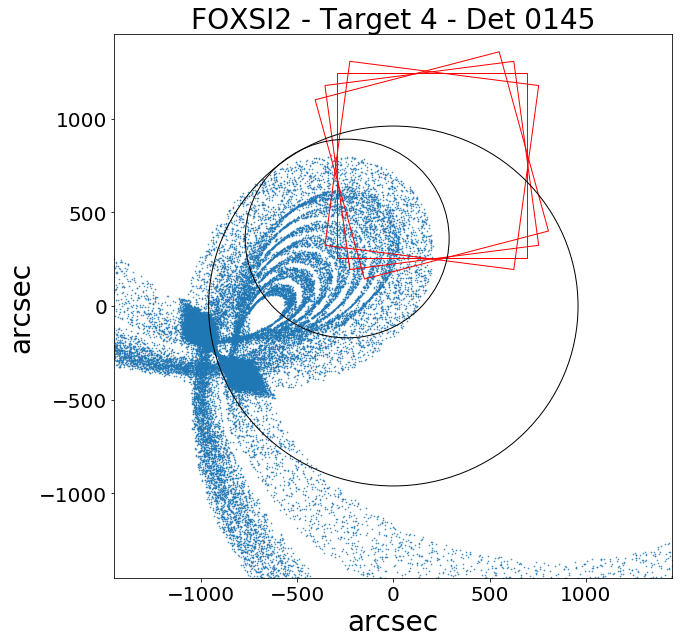

In [3]:
# Plotting
tc = 'tab:blue'
fig, ax = plt.subplots(figsize=(10,10))
# ornaments
ax.set_xlim(-1450,1450)
ax.set_ylim(-1450,1450)
ax.set_xlabel('arcsec',fontsize=28)
ax.set_ylabel('arcsec',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI2 - Target 4 - Det 0145',fontsize=28)
# sources:
Dir = './D0145_rays/'
source = Dir+'D0145S1.csv'
S_Hx, S_Hy, S_Px, S_Py, S_Dx, S_Dy = readrays(source) # Read Rays
ax.scatter(S_Hx,S_Hy,color=tc,s=.4,alpha=0.8,label=source[-6:-4])
ax.scatter(S_Px,S_Py,color=tc,s=.4,alpha=0.8)
ax.scatter(S_Dx,S_Dy,color=tc,s=.4,alpha=0.8)
# D0145 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[0]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[0]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[1]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[1]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[1],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[4]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[4]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[5]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[5]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[5],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
solardisk = patches.Circle((0,0),radius= Rsun,fill=False);ax.add_patch(solardisk)
circ = patches.Circle((Xmask,Ymask),radius= Rmask,fill=False);ax.add_patch(circ)
plt.show()
fig.savefig('images/SourcesT4_D0145_Mask.png',bbox_inches='tight',dpi=300)
plt.close(fig)

# Handling IDL SAV files 
### [FOXSI2 T4 D0145]

In [4]:
from scipy.io import readsav
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
det = 0
DataDir = './DataFOXSI2/'
offset_xy = [360., -180.]
T4x, T4y = 200, 750
Dang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
tlaunch = 69060.
Erange = [5, 10] # maximize the amount of counts we got
thr_n = 4.
R07s = 530

def All_Data(datafile,Erange,Trange):
    ''' return all data - Good and No Good - '''
    # Read SAV LEV2 data : 
    data_lvl2_d6 = readsav(DataDir+datafile)[datafile[:-4]]
    # Energy selection :
    data_lvl2_d6_E = data_lvl2_d6[(np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] > Erange[0]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] < Erange[1]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[0] > thr_n)]
    # Time selection :
    data_lvl2_d6_ET = data_lvl2_d6_E[(data_lvl2_d6_E['wsmr_time'] > Trange[0]) & 
                                    (data_lvl2_d6_E['wsmr_time'] < Trange[1])]
    return data_lvl2_d6_ET

def Good_Data(datafile,Erange,Trange):
    # Read SAV LEV2 data : 
    data_lvl2_d6 = readsav(DataDir+datafile)[datafile[:-4]]
    # Energy selection :
    data_lvl2_d6_E = data_lvl2_d6[(np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] > Erange[0]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] < Erange[1]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[0] > thr_n)]
    # Time selection :
    data_lvl2_d6_ET = data_lvl2_d6_E[(data_lvl2_d6_E['wsmr_time'] > Trange[0]) & 
                                    (data_lvl2_d6_E['wsmr_time'] < Trange[1])]
    # Good_Data selection :
    data_lvl2_d6_ET_noerr = data_lvl2_d6_ET[data_lvl2_d6_ET['ERROR_FLAG']==0]
    return data_lvl2_d6_ET_noerr

def plotdata(FXDX, det):
    fig, ax = plt.subplots(figsize=(10,10))
    # ornaments
    ax.set_xlim(-1450,1450)
    ax.set_ylim(-1450,1450)
    ax.set_xlabel('arcsec',fontsize=28)
    ax.set_ylabel('arcsec',fontsize=28)
    ax.tick_params(axis='both', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    # FOXSI2 Data
    ax.scatter(np.stack(FXDX['HIT_XY_SOLAR']).T[0] + offset_xy[0],
               np.stack(FXDX['HIT_XY_SOLAR']).T[1]+ offset_xy[1],
               marker='o',color='black',alpha=0.4)
    # D6 - Si
    l = 990
    mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-45)) + 1)
    my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-135)) + 1)
    rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[det],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    solardisk = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(solardisk)
    r = (R10s if det == 6 else R07s)
    circ = patches.Circle((Xmask,Ymask),radius= r,fill=False);ax.add_patch(circ)
    plt.show()
    fig.savefig('F2T4D'+str(det)+'S.png',bbox_inches='tight',dpi=300)
    plt.close(fig)

def plotspect(FXDX):
    es = np.stack(FXDX['hit_energy']).T[1] # get energy values
    det = FXDX['det_num'][0]
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8,6))
    # ornaments
    ax.set_xlim(4,11)
    ax.set_ylim(0,1)
    ax.set_xlabel('Energy [keV]',fontsize=28)
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    ax.axvspan(5, 10, alpha=0.2, color='grey')
    # FOXSI2 Data
    ax.scatter(es, np.ones_like(es)*.5,s=250, c='grey', marker='o',alpha=0.7)
    ax.vlines(es,ymin=0,ymax=1,color='grey',linestyles='dashed')
    plt.show()
    fig.savefig('F2T4D'+str(det)+'_Spec.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

def plothist(FXDX):
    barwidth, emin, emax = 0.5, 5, 10
    es = np.stack(FXDX['hit_energy']).T[1] # get energy values
    y,binEdges = np.histogram(es,bins=int((emax-emin)/barwidth),range=(emin,emax))
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    menStd     = np.sqrt(y)
    det = FXDX['det_num'][0]
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8,6))
    # ornaments
    ax.set_xlim(4,11)
    ax.set_xlabel('Energy [keV]',fontsize=28)
    ax.set_ylabel('Counts',fontsize=28)
    #ax.set_yticks([])
    ax.tick_params(axis='both', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    ax.axvspan(emin, emax, alpha=0.2, color='grey')
    # FOXSI2 Data
    plt.bar(bincenters, y, width=barwidth, color='grey', yerr=menStd)
    plt.show()
    fig.savefig('F2T4D'+str(det)+'_Hist.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

In [5]:
# Defining times:
t4_start = 373.5
t4_end   = 466.2
t5_start = 
t5_end   = 
t_shtr_start = 438.0 + 4. # add +4sec to test background
t_shtr_end   = 442.0
Trange0145 = np.array((t4_start, t_shtr_start)) + tlaunch
Trangeshtr = np.array((t_shtr_start, t4_end)) + tlaunch
Trangebkgd = np.array((t5_start, t5_end)) + tlaunch